Problem1 --Creating Your First Model

Answer 1. Implement a function closed_form_1 that computes this closed form solution given the features 𝐗, labels Y (using Python or Matlab).

In [59]:
import pandas as pd
import numpy as np
climate_change_1 = pd.read_csv('climate_change_1.csv')

In [60]:
#divide the data into train and test set
climate_change_1_train = climate_change_1[climate_change_1['Year']<2007]
climate_change_1_test = climate_change_1[climate_change_1['Year']>2006]
climate_change_1_train_Y = climate_change_1_train['Temp']
climate_change_1_train_X = climate_change_1_train.iloc[:,1:10]
climate_change_1_train_X['Month']=1
climate_change_1_test_Y = climate_change_1_test['Temp']
climate_change_1_test_X = climate_change_1_test.iloc[:,2:10]
#print(climate_change_1_train_Y)
#print(climate_change_1_train_X)
estimationtheta = np.dot(np.linalg.inv(np.dot(climate_change_1_train_X.T,climate_change_1_train_X)),climate_change_1_train_X.T)
#print(estimationtheta)
estimationtheta = np.dot(estimationtheta,climate_change_1_train_Y)
#print(estimationtheta)

In [61]:
def closed_form_1(x,y):
    estimationtheta = np.linalg.inv(np.dot(x.T,x))
    estimationtheta = np.dot(estimationtheta,x.T)
    estimationtheta = np.dot(estimationtheta,y)
    return estimationtheta
theta_est = closed_form_1(climate_change_1_train_X,climate_change_1_train_Y)
print('Estimated theta is',theta_est)

Estimated theta is [-1.24594261e+02  6.42053134e-02  6.45735927e-03  1.24041896e-04
 -1.65280033e-02 -6.63048889e-03  3.80810324e-03  9.31410838e-02
 -1.53761324e+00]


Answer2. Write down the mathematical formula for the linear model and evaluate the model R2 on the training set and the testing set.

In [62]:
from sklearn.linear_model import LinearRegression
climate_change_1_train_X = climate_change_1_train.iloc[:,2:10]
model = LinearRegression()
model.fit(climate_change_1_train_X,climate_change_1_train_Y)
a  = model.intercept_#intercept
b = model.coef_#theta
#print("intercept",a,",theta：",b)
r2_train = model.score(climate_change_1_train_X,climate_change_1_train_Y)
print('R Square on training set is',r2_train)

R Square on training set is 0.7508932770523417


In [63]:
def R2(y_pred,y_test):
    SStot = np.sum((y_test-np.mean(y_test))**2)
    SSres = np.sum((y_pred-np.mean(y_test))**2)
    r2 = SSres/SStot
    return r2

climate_change_1_test_Y = climate_change_1_test['Temp']
climate_change_1_test_X = climate_change_1_test.iloc[:,1:10]
climate_change_1_test_X['Month']=1
r2_test = R2(np.dot(climate_change_1_test_X,theta_est),climate_change_1_test_Y)
print('R Square on testing set is',r2_test)

R Square on testing set is 0.22517701648821745


Answer 3.Which variables are significant in the model?

In [65]:
import statsmodels.api as sm
from statsmodels import regression
climate_change_1_train_X_new=sm.add_constant(climate_change_1_train_X)
model=sm.OLS(climate_change_1_train_Y,climate_change_1_train_X_new)
res=model.fit()
Bata=res.params
#print(Bata)
res.summary()
print('All the variablesexcept for CH4,N2O all are significant')

All the variablesexcept for CH4,N2O all are significant


Answer 4.Write down the necessary conditions for using the closed form solution. And you can apply it to the dataset climate_change_2.csv, explain the solution is unreasonable.

The necessary condition is that the XTX is convertible which means that it is full rank.
The solution is unreasonable because the X is so sparse and XTX is not convertible not with full rank.

In [66]:
#question 4
#The X is so sparse.
#divide the data into train and test set
climate_change_2 = pd.read_csv('climate_change_2.csv')
climate_change_2_train = climate_change_2[climate_change_2['Year']<2007]
climate_change_2_test = climate_change_2[climate_change_2['Year']>2006]
climate_change_2_train_Y = climate_change_2_train['Temp']
climate_change_2_train_X = climate_change_2_train.iloc[:,1:11]
climate_change_2_train_X['Month']=1
climate_change_2_test_Y = climate_change_2_test['Temp']
climate_change_2_test_X = climate_change_2_test.iloc[:,2:11]
#print(climate_change_1_train_Y)
#print(climate_change_1_train_X)
theta_est2 = closed_form_1(climate_change_2_train_X,climate_change_2_train_Y)
print('Estimated theta is',theta_est2)

Estimated theta is [-1.93020753e+02  1.62621875e-01  6.05068002e-03 -6.61255665e-02
 -1.65280033e-02 -6.63048891e-03  3.80810325e-03  9.31410844e-02
 -1.53761324e+00  6.65262454e+01]


Problem 2 Regularization

Answer: 1.Please write down the loss function for linear model with L1 regularization, L2 regularization, respectively.

L1 regularization:
$$ (Y - X\beta)^T(Y-X\beta)+\lambda|\beta|$ $$
L2 regularization:
$$ (Y - X\beta)^T(Y-X\beta)+\lambda|\beta|^2$ $$

Answer: 2. The closed form solution for linear model with L2 regularization:
𝛉 = (𝐗𝐓𝐗 + 𝛌𝐈)_1𝐗𝐓𝐘
where I is the identity matrix. Write a function closed_form_2 that computes this closed form solution given the features X, labels Y and the regularization parameter λ (using Python or Matlab).

In [70]:
#question 2.2
def closed_form_2(x,y,lamb):
    estimationtheta = np.linalg.inv(np.dot(x.T,x)+np.eye(x.shape[1])*lamb)
    estimationtheta = np.dot(estimationtheta,x.T)
    estimationtheta = np.dot(estimationtheta,y)
    return estimationtheta
climate_change_1_train_Y = climate_change_1_train['Temp']
climate_change_1_train_X = climate_change_1_train.iloc[:,1:10]
climate_change_1_train_X['Month']=1
climate_change_1_test_Y = climate_change_1_test['Temp']
climate_change_1_test_X = climate_change_1_test.iloc[:,1:10]
climate_change_1_test_X['Month']=1
theta_l2 = closed_form_2(climate_change_1_train_X,climate_change_1_train_Y,0.01)
print('Estimated theta with L2 is',theta_l2)
# prevent overfitting

Estimated theta with L2 is [-2.62324146e-01  5.46344723e-02  6.35012916e-03  7.94610956e-05
 -1.34794077e-02 -5.83699154e-03  3.59093203e-03  1.44947810e-03
 -1.26505174e+00]


Answer: 3.Compare the two solutions in problem 1 and problem 2 and explain the reason why linear model with L2 regularization is robust. (using climate_change_1.csv)

In [79]:
norm_1=np.linalg.norm(theta_est)
norm_2=np.linalg.norm(theta_l2)
print(norm_1)
print(norm_2)

124.60380107885653
1.2932230624781718


The L2 norm of the linear model with L2 regularization is much smaller than the L2 norm of the linear model without L2 regularization. In that case, the model with L2 regularization is less sensitive about the change of the variables, which means that it is more robust.

Answer: 4. You can change the regularization parameter λ to get different solutions for this problem. Suppose we set λ = 10, 1, 0.1, 0.01, 0.001, and please evaluate the model R2 on the training set and the testing set. Finally, please decide the best regularization parameter λ. (Note that: As a qualified data analyst, you must know how to choose model parameters, please learn about cross validation methods.)

In [81]:
# question 4
from sklearn.metrics import r2_score
def R2(y_pred,y_test):
    SStot = np.sum((y_test-np.mean(y_test))**2)
    SSres = np.sum((y_pred-np.mean(y_test))**2)
    r2 = SSres/SStot
    return r2

def predict_l2(theta,X_train):
    y_pred = np.dot(X_train,theta)
    return (y_pred)
climate_change_1_train_Y = climate_change_1_train['Temp']
climate_change_1_train_X = climate_change_1_train.iloc[:,1:10]
climate_change_1_train_X['Month']=1
climate_change_1_test_Y = climate_change_1_test['Temp']
climate_change_1_test_X = climate_change_1_test.iloc[:,1:10]
climate_change_1_test_X['Month']=1

train_r2 = []
test_r2 = []
lambda_set = [10,1,0.1,0.01,0.001]
for ii in lambda_set:
    theta = closed_form_2(climate_change_1_train_X,climate_change_1_train_Y,ii)
    train_pred = predict_l2(theta,climate_change_1_train_X)
    R2_train = R2(train_pred,climate_change_1_train_Y)
    train_r2.append(R2_train)
    test_pred = predict_l2(theta,climate_change_1_test_X)
    R2_test = R2(test_pred,climate_change_1_test_Y)
    test_r2.append(R2_test)

print('R2 on training data',train_r2)
print('R2 on testing data',test_r2)

R2 on training data [0.6746079231231252, 0.6794692110077019, 0.6944684109167354, 0.7116529617404003, 0.7148330433310096]
R2 on testing data [0.9408716922329128, 0.8467501180016944, 0.6732879125796498, 0.5852763146102683, 0.5625217960387379]


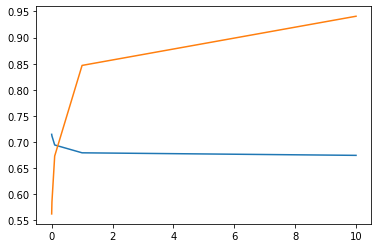

In [83]:
import matplotlib.pyplot as plt
plt.plot(lambda_set,train_r2)
plt.plot(lambda_set,test_r2)
plt.show()

In [86]:
#use cross validation to choose the lambda
from sklearn.linear_model import Ridge,RidgeCV
model = RidgeCV(alphas=[10,1,0.1,0.01,0.001]) 
climate_change_1_train_Y = climate_change_1_train['Temp']
climate_change_1_train_X = climate_change_1_train.iloc[:,2:10]
model.fit(climate_change_1_train_X, climate_change_1_train_Y) 
print('the best alpha',model.alpha_) 

the best alpha 0.01


Problem 3 — Feature Selection

Answer: 1. From Problem 1, you can know which variables are significant, therefore you can use less variables to train model. For example, remove highly correlated and redundant features. You can propose a workflow to select feature.

Solution 1: Manually remove the correlated and unsignificant features.
Delete N20, CH4, CFC-12 because they are highly related and delete CFC-11 because it is not significant.

In [88]:
# question 3
#workflow 1
# 1.1 Highly related variables remove "highly related" VIF
climate_change_1_train_X = climate_change_1_train.iloc[:,2:10]
climate_change_1_train_X.corr()
#80% above is considered as highly related
#CO2,CH4 CO2,N2O CO2,CFC-12
#N2O,CH4 N2O,CFC-12
#CFC-11,CFC-12

#delete N2O,CH4,CFC-12
climate_change_1_train_X_new = climate_change_1_train.loc[:,['MEI','CO2','CFC-11','TSI','Aerosols']]

# 1.2 run a regression remove not significant with alpha = 0.01
import statsmodels.api as sm
from statsmodels import regression
climate_change_1_train_X_new=sm.add_constant(climate_change_1_train_X_new)
model=sm.OLS(climate_change_1_train_Y,climate_change_1_train_X_new)
res=model.fit()
#Bata=res.params
#print(Bata)
res.summary()

#delete CFC-11 is not significant

# 1.3 run the final model
climate_change_1_train_X_new_2 = climate_change_1_train.loc[:,['MEI','CO2','TSI','Aerosols']]
climate_change_1_train_X_new_2=sm.add_constant(climate_change_1_train_X_new_2)
model=sm.OLS(climate_change_1_train_Y,climate_change_1_train_X_new_2)
res=model.fit()
#Bata=res.params
#print(Bata)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     192.1
Date:                Wed, 25 Dec 2019   Prob (F-statistic):           7.36e-79
Time:                        14:27:15   Log-Likelihood:                 270.59
No. Observations:                 284   AIC:                            -531.2
Df Residuals:                     279   BIC:                            -512.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -118.6016     19.906     -5.958      0.000    -157.787     -79.416
MEI            0.0620      0.007      9.438      0.000       0.049       0.075
CO2            0.0107      0.001     19.777      0.000       0.010       0.012
TSI            0.0842      0.015      5.764      0.000       0.055       0.113
Aerosols      -1.5844      0.217     -7.303      0.000      -2.011      -1.157
==============================================================================
Omnibus:                       14.491   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.210
Skew:                           0.444   Prob(JB):                     0.000183
Kurtosis:                       3.817   Cond. No.                     5.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Solution 2: Use LASSO to select features.
Select the CO2, CFC-12, CFC-11,CH4

In [107]:
import pandas as pd
import numpy as np
import csv as csv
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

climate_change_1_train_Y = climate_change_1_train['Temp']
climate_change_1_train_X = climate_change_1_train.iloc[:,2:10]
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model,climate_change_1_train_X,climate_change_1_train_Y, scoring="neg_mean_squared_error", cv = 3))
    return(rmse)

model_lasso = LassoCV(alphas = [0.1,1,0.01,10],cv=5).fit(climate_change_1_train_X, climate_change_1_train_Y)


print(model_lasso.coef_)

coef = pd.Series(model_lasso.coef_, index =climate_change_1_train_X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
print(rmse_cv(model_lasso).mean())

[ 0.00000000e+00  4.56350785e-03  3.94375225e-05  0.00000000e+00
 -3.14327394e-03  2.26800658e-03  0.00000000e+00 -0.00000000e+00]
Lasso picked 4 variables and eliminated the other 4 variables
0.22806213106989082


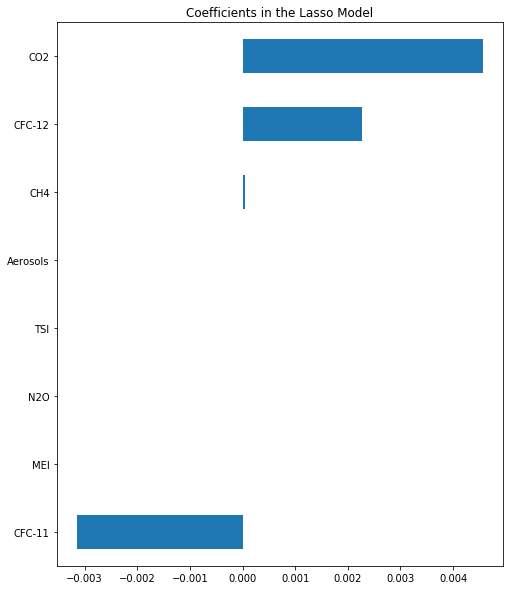

In [111]:
imp_coef = pd.concat([coef.sort_values()])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

Answer: 2. Train a better model than the model in Problem 2.

In [118]:
#question 3.2
#select the CH4,CO2,CFC-11,CFC-12 with LASSO
# rigde regression
import numpy as np
from sklearn.linear_model import Ridge,RidgeCV
from sklearn import linear_model
clf = linear_model.Ridge(alpha=0.1) 
climate_change_1_train_X_new = climate_change_1_train.loc[:,['CH4','CO2','CFC-11','CFC-12']]
closed_form_2(climate_change_1_train_X_new,climate_change_1_train_Y,0.1)

array([-0.00106333,  0.00424774, -0.0051454 ,  0.00378017])

Problem4-Gradient Descent

Answer: Gradient descent algorithm is an iterative process that takes us to the minimum of a function. Please write down the iterative expression for updating the solution of linear model and implement it using Python or Matlab in gradientDescent function.

repeat until convergence : {
$$ \theta_0\: = \theta_0-\alpha\frac{1}{m}\sum\limits_{m=1}^m(h_\theta(x^i)-y^i)$$
$$ \theta_1\: = \theta_1-\alpha\frac{1}{m}\sum\limits_{m=1}^m((h_\theta(x^i)-y^i)x^i)$$

}

In [3]:
# problem 4
def gradientdescent(alpha,initial,X,Y,theta_0):
    learningRate = 0.001
    iter_Max = 10000
    threshold = 1e-8
    gap = 1000
    x = initial
    iter_n = 0
    loss = (1./len(X))*np.dot(X.T,np.dot(X.T,(np.dot(x,theta))-Y))
    while (gap>threshold and iter_n < iter_Max):
        theta = theta - alpha * (1./len(X)) * np.dot(X.T,(np.dot(X,theta) - Y))
        loss = (1./len(X))*np.dot(X.T,np.dot(X.T,(np.dot(x,theta))-Y))
        X_New = X - learningRate*grad
        gap = norm(X_New - X, 2)
        X = X_New
        iter_n += 1             